In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
d=pd.read_csv("/home/soniya/Downloads/onlinesalary.csv")

In [15]:
d.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [16]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Marketing Spend  50 non-null     float64
 1   Administration   50 non-null     float64
 2   Transport        50 non-null     float64
 3   Area             50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [17]:
d.isna().sum()

Marketing Spend    0
Administration     0
Transport          0
Area               0
Profit             0
dtype: int64

In [18]:
d.describe()

,Marketing Spend,Administration,Transport,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [19]:
import seaborn as sns

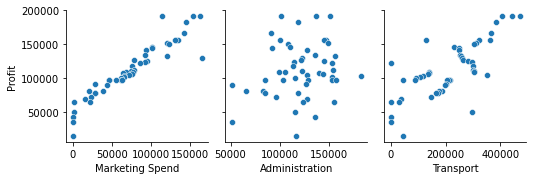

In [23]:
sns.pairplot(data=d[['Marketing Spend','Administration','Transport','Area','Profit']],x_vars=['Marketing Spend','Administration','Transport'],y_vars=['Profit'],aspect=1)

<AxesSubplot:xlabel='Transport', ylabel='Profit'>

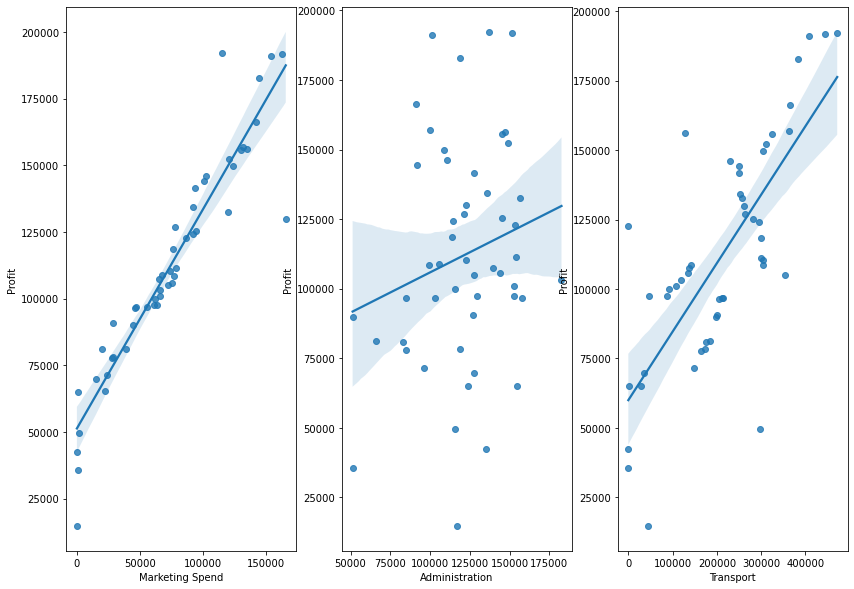

In [61]:
fig, axs = plt.subplots(ncols=3, figsize=(14,10))
sns.regplot(x='Marketing Spend', y='Profit', scatter= True, data=d, ax=axs[0])
sns.regplot(x='Administration', y='Profit', scatter=True, data=d, ax=axs[1])
sns.regplot(x='Transport',y='Profit', scatter=True, data=d, ax=axs[2])



In [41]:
x=d.iloc[:,:3].values
y=d.iloc[:,-1].values

In [42]:
x

array([[114523.61, 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42],
       [131876.9 ,  99814.71, 362861.36],
       [134615.46, 147198.87, 127716.82],
       [130298.13, 145530.06, 323876.68],
       [120542.52, 148718.95, 311613.29],
       [123334.88, 108679.17, 304981.62],
       [101913.08, 110594.11, 229160.95],
       [100671.96,  91790.61, 249744.55],
       [ 93863.75, 127320.38, 249839.44],
       [ 91992.39, 135495.07, 252664.93],
       [119943.24, 156547.42, 256512.92],
       [165349.2 , 122616.84, 261776.23],
       [ 78013.11, 121597.55, 264346.06],
       [ 94657.16, 145077.58, 282574.31],
       [ 91749.16, 114175.79, 294919.57],
       [ 86419.7 , 153514.11,      0.  ],
       [ 76253.86, 113867.3 , 298664.47],
       [ 78389.47, 153773.43, 299737.29],
       [ 73994.56, 122782.75, 303319.26],
       [ 67532.53, 105751.03, 3047

In [43]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [45]:
from sklearn import linear_model

In [46]:
lr = linear_model.LinearRegression()


In [47]:
lr.fit(x,y)

LinearRegression()

In [49]:
pred= lr.predict(x)

In [50]:
print(lr.intercept_)
print(lr.coef_)


42058.114995804295
[0.69400705 0.03630713 0.06816975]


In [52]:
coeffs = pd.DataFrame(lr.coef_, x.columns, columns=['Coefficient'])
coeffs

NameError: name 'X' is not defined

In [56]:
profit = pd.DataFrame({'Actual':y,'Predtn':pred})


In [58]:
profit.head()

,Actual,Predtn
0,192261.83,158670.076740
1,191792.06,190658.601727
2,191050.39,180028.704016
3,182901.99,172684.841068
4,166187.94,168961.392527


In [59]:
from sklearn import metrics
import numpy as np

print('MAE:',metrics.mean_absolute_error(y, pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y,pred)))
print('Average Cost:',y.mean())
print('R-Squared',metrics.r2_score(y,pred))


MAE: 8302.434374374281
RMSE: 12551.780030653968
Average Cost: 112012.63920000002
R-Squared 0.9010441949658275
